# Sci-Kit Learn
https://scikit-learn.org/stable/index.html

This notebook is an overview of the scikit-learn Python library.

***


### What is Sci-Kit Learn?

Sci-Kit Learn is a simple and efficient tool for predictive data analysis that uses a machine learning library for the Python programming language. Scikit-learn integrates well with many other Python libraries, such as Matplotlib and plotly for plotting, NumPy for array vectorization, Pandas dataframes, SciPy, and many more.

### What can it do?

With these different algorithms and machine learnin techniques, sci-kit learn provides many different methods of doing data analysis using Regression, Classification, Clustering, Dimensionality Reduction, Model Selection and pre-processing.

### Why us Sci-Kit Learn?

Sci-kit Learn is use across industry in various scenarios for companies, as well as being extremely effective in academia to demonstrate the uses of machine learning and data analysis. It can be integrated into Jupyter notebook to provide a clean and effective learning experience.


***

### What kind of algorithms are there and where are they used?
###### Sci-Kit learn uses 6 very different methods to analyse data, all with different abilities, strengths and different algorithms to implement them:

#### Classification
Classification in data analysis/machine learning is identifying which category an object belongs to based on previous data. A good example of this would be an mail system identifying which emails are spam and which are not, putting the two categories into their own "classes".

#### Regression
Classification in data analysis/machine learning is predicting a continuous-valued attribute associated with an object based on previous data. Predicting prices of a house given the features of house like size, price etc is one of the common examples of Regression.

#### Clustering 
Classification in data analysis/machine learning is the automatic grouping of similar objects into sets. Retail companies often use clustering to identify groups of households that are similar to each other.

#### Dimensionality reduction 
Dimensionality reduction in data analysis/machine learning is reducing the number of random variables to consider in a data set. It reduces the time and storage space required. It helps Remove multi-collinearity which improves the interpretation of the parameters of the machine learning model.

#### Model Selection
Model Selection in data analysis/machine learning is  is the process of selecting one final machine learning model from among a collection of candidate machine learning models for a training dataset. 

#### Preprocessing 
Preprocessing in Machine Learning refers to the technique of preparing (cleaning and organizing) the raw data to make it suitable for a building and training Machine Learning models.

We will look at 3 different examples of what Sci-Kit Learn can do below, using classification, regression and clustering on three different sets of data.

***

## Classification

### What is Classification?

Classification is data analysis and machine learning is the grouping of objects based on other input data. A real life example of this would be when your email website sorts emails into 'spam' and 'non-spam' folders based on what it believes to be the characterstics of a spam email.
***


#### Seed species data set

This set of data looks at three similar types of seeds - It compares them based on their area, length, width and groove length.

We will be using Sci-Kit learns built in classification functionalities on this data set.
***

#### Setup

In [76]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

# Supress future warnings
import warnings
warnings.filterwarnings('ignore')

# Clustering imports
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# To scale our variables
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
# to evaluate the model
from sklearn.metrics import confusion_matrix,classification_report


In [77]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

### Dataset
***

#### This is a seeds dataset which compares the seeds area, its kernal dimensions and its groove length.

In [78]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/kealanocallaghan2000/datasets/master/seeds_dataset_final.csv", sep = ",")

In [79]:
# viewing the data
df

,Area,Kernel L,Kernel W,Groove L,Species
0,15.26,5.763,3.312,5.220,Kama
1,14.88,5.554,3.333,4.956,Kama
2,14.29,5.291,3.337,4.825,Kama
3,13.84,5.324,3.379,4.805,Kama
4,16.14,5.658,3.562,5.175,Kama
...,...,...,...,...,...
205,12.19,5.137,2.981,4.870,Canadian
206,11.23,5.140,2.795,5.003,Canadian
207,13.20,5.236,3.232,5.056,Canadian
208,11.84,5.175,2.836,5.044,Canadian


In [80]:
# Summary statistics.
df.describe()

,Area,Kernel L,Kernel W,Groove L
count,210.000000,210.000000,210.000000,210.000000
mean,14.847524,5.628533,3.258605,5.408071
std,2.909699,0.443063,0.377714,0.491480
min,10.590000,4.899000,2.630000,4.519000
25%,12.270000,5.262250,2.944000,5.045000
50%,14.355000,5.523500,3.237000,5.223000
75%,17.305000,5.979750,3.561750,5.877000
max,21.180000,6.675000,4.033000,6.550000


### Plot
***

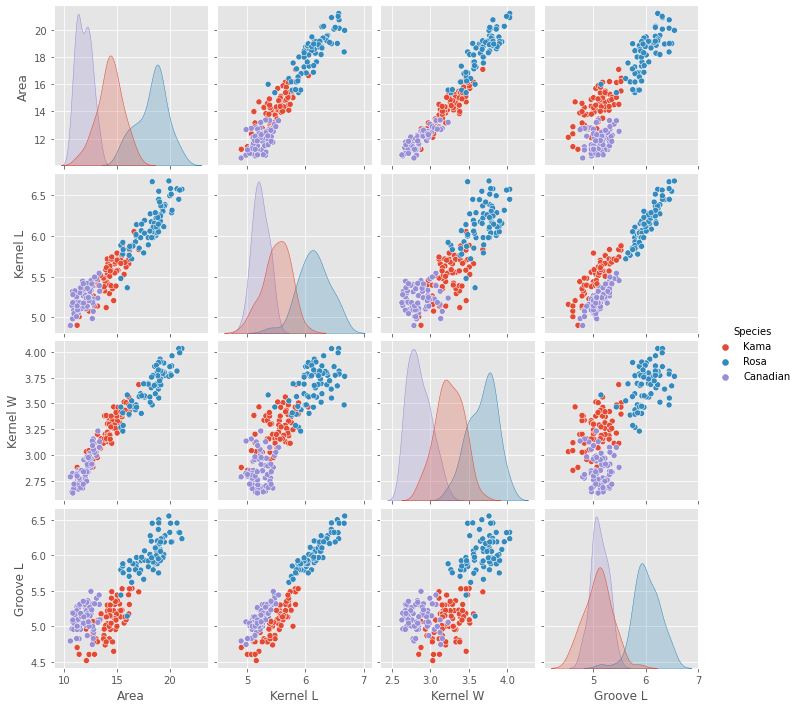

In [81]:
# Scatter plots and kdes.
sns.pairplot(df, hue='Species');

### Two Dimensions

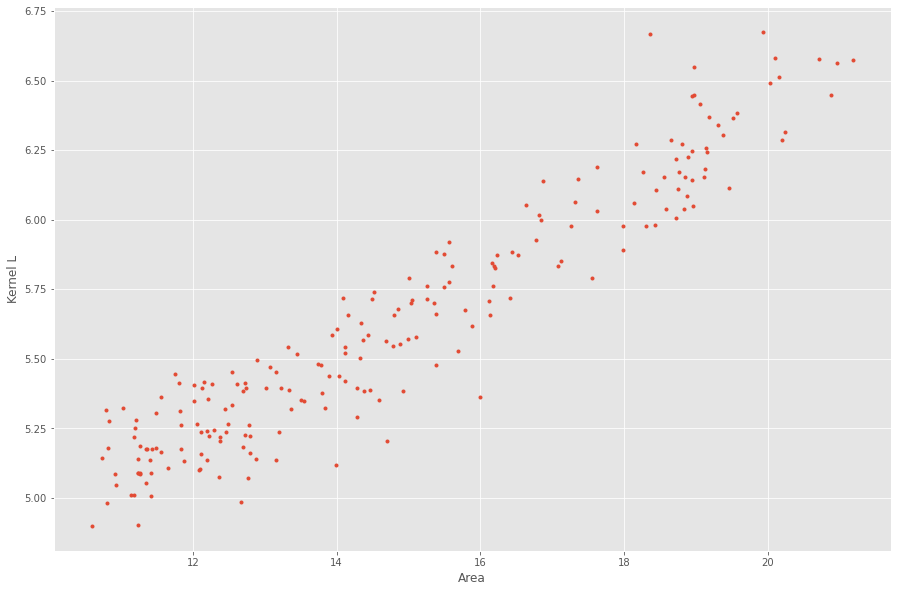

In [82]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['Area'], df['Kernel L'], '.')

# Set axis labels.
ax.set_xlabel('Area');
ax.set_ylabel('Kernel L');

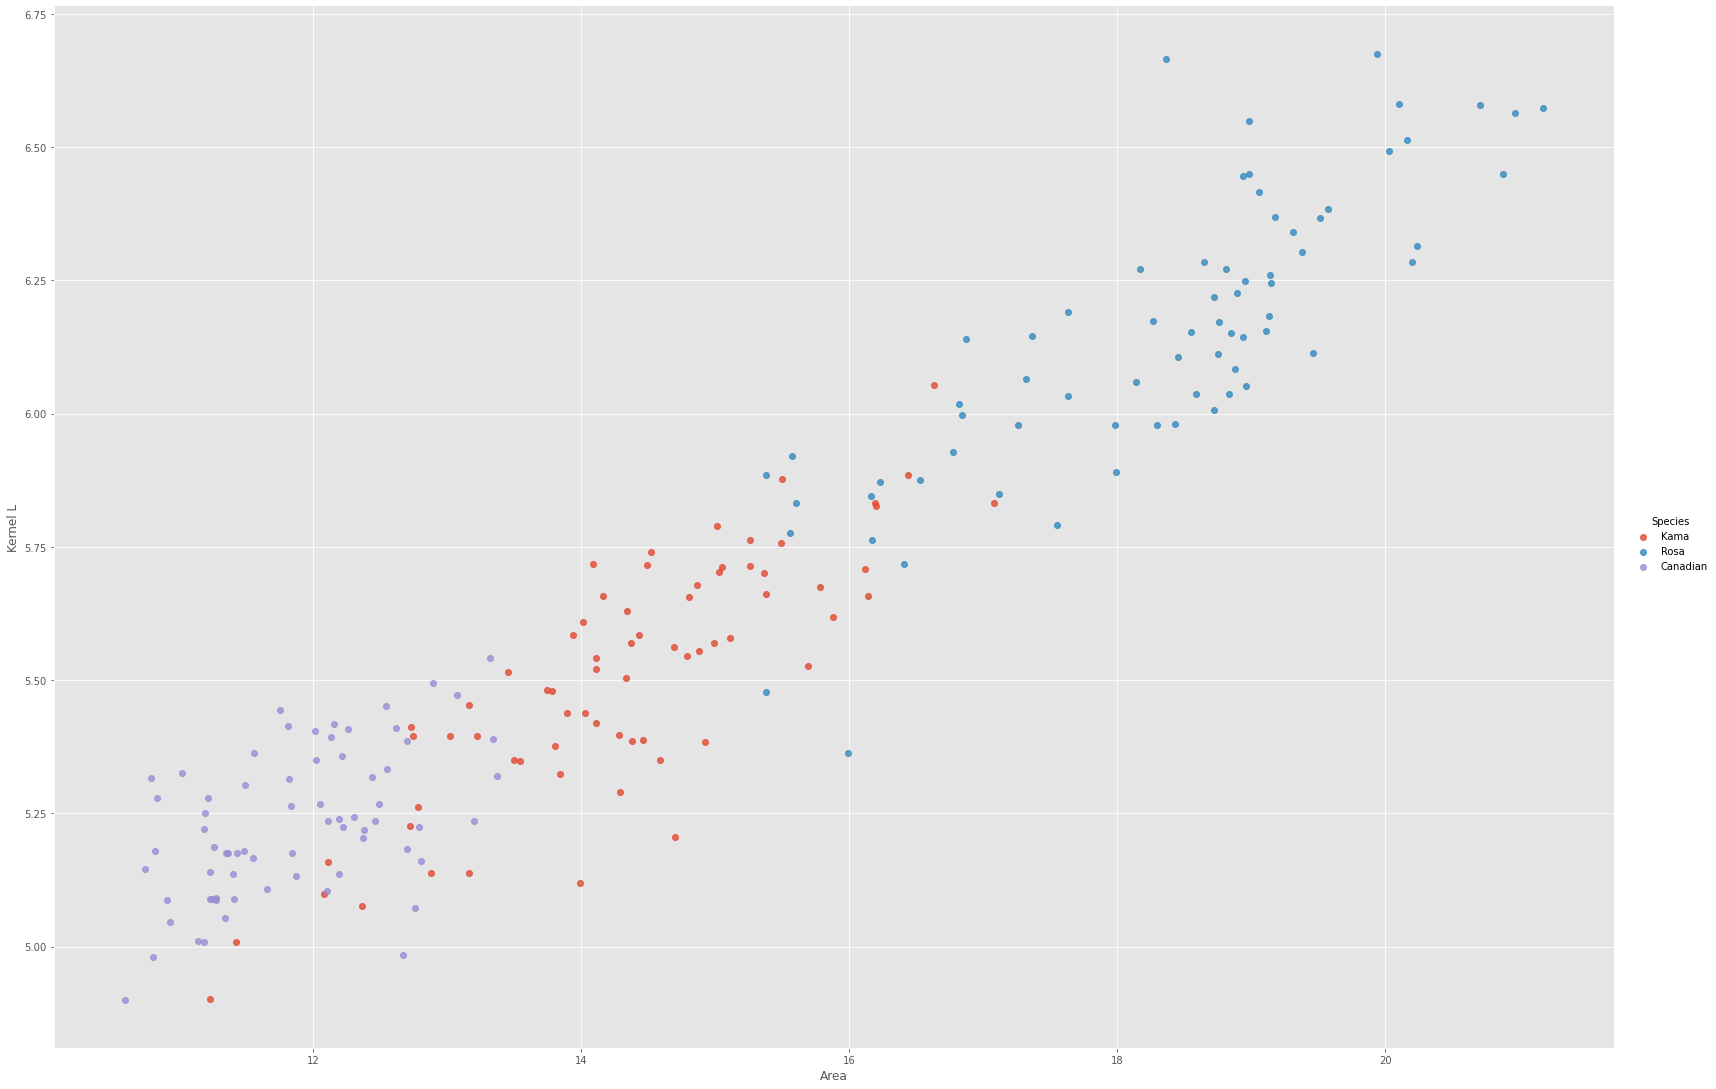

In [83]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="Area", y="Kernel L", hue='Species', data=df, fit_reg=False, height=15, aspect=1.5);

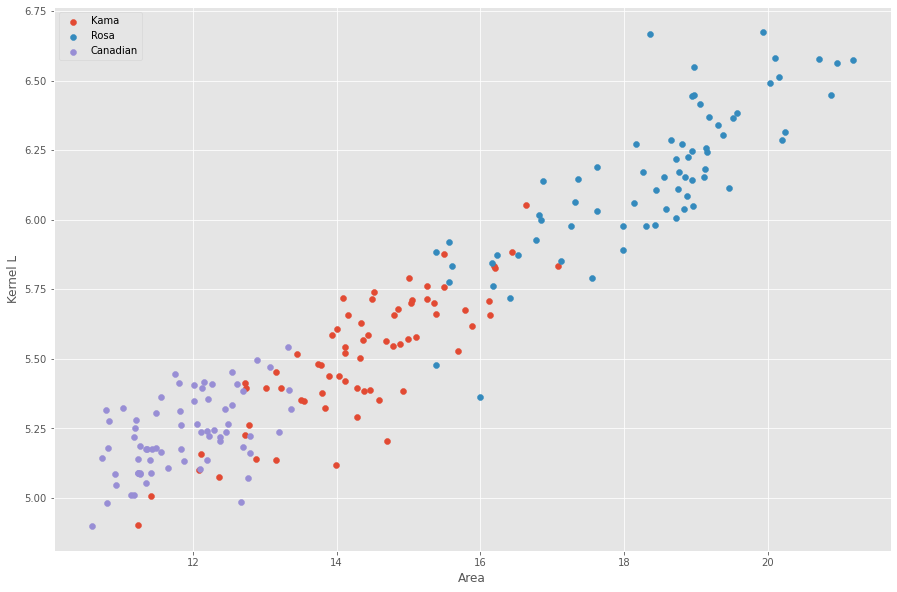

In [84]:
# Segregate the data.
kama = df[df['Species'] == 'Kama']
rosa = df[df['Species'] == 'Rosa']
cana = df[df['Species'] == 'Canadian']


# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(kama['Area'], kama['Kernel L'], label='Kama')
ax.scatter(rosa['Area'], rosa['Kernel L'], label='Rosa')
ax.scatter(cana['Area'], cana['Kernel L'], label='Canadian')


# Show the legend.
ax.set_xlabel('Area')
ax.set_ylabel('Kernel L')
ax.legend();

In [85]:
# How the segregation works.
df['Species'] == 'Canadian'

0      False
1      False
2      False
3      False
4      False
       ...  
205     True
206     True
207     True
208     True
209     True
Name: Species, Length: 210, dtype: bool

In [86]:
df[df['Species'] == 'Canadian'].head()

,Area,Kernel L,Kernel W,Groove L,Species
140,13.07,5.472,2.994,5.395,Canadian
141,13.32,5.541,3.073,5.440,Canadian
142,13.34,5.389,3.074,5.307,Canadian
143,12.22,5.224,2.967,5.221,Canadian
144,11.82,5.314,2.777,5.178,Canadian


### Use Groupby()
***

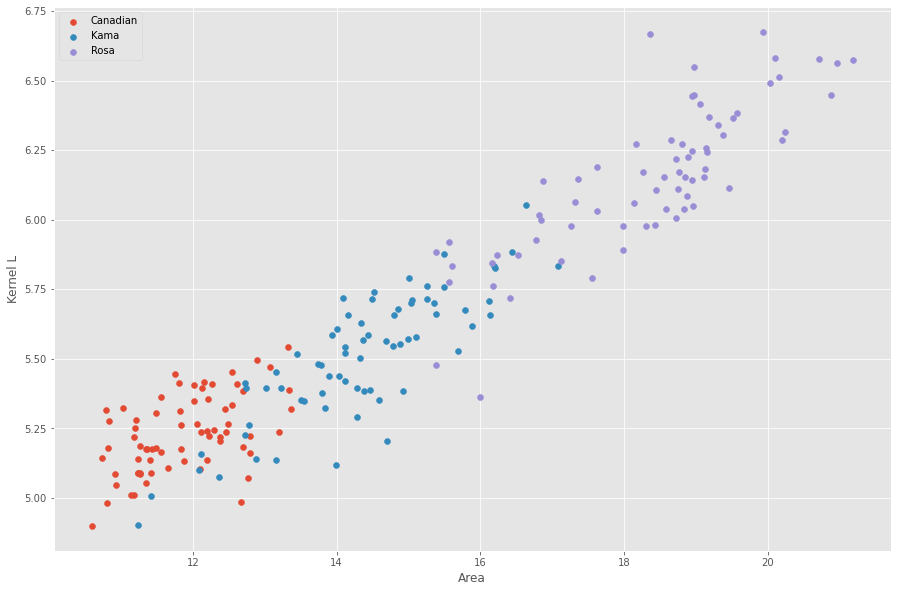

In [87]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for Species, data in df.groupby('Species'):
    ax.scatter(data['Area'], data['Kernel L'], label=Species)

# Show the legend.
ax.set_xlabel('Area')
ax.set_ylabel('Kernel L')
ax.legend();

In [88]:
# Group by typically takes a categorical variable.
x = df.groupby('Species')
x

In [89]:
# Pivot tables.
x.mean()

,Area,Kernel L,Kernel W,Groove L
Species,,,,
Canadian,11.873857,5.229514,2.853771,5.116400
Kama,14.334429,5.508057,3.244629,5.087214
Rosa,18.334286,6.148029,3.677414,6.020600


In [90]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: 'Canadian'
j looks like:
      Area  Kernel L  Kernel W  Groove L   Species
140  13.07     5.472     2.994     5.395  Canadian
141  13.32     5.541     3.073     5.440  Canadian
142  13.34     5.389     3.074     5.307  Canadian


i is: 'Kama'
j looks like:
    Area  Kernel L  Kernel W  Groove L Species
0  15.26     5.763     3.312     5.220    Kama
1  14.88     5.554     3.333     4.956    Kama
2  14.29     5.291     3.337     4.825    Kama


i is: 'Rosa'
j looks like:
     Area  Kernel L  Kernel W  Groove L Species
70  17.63     6.191     3.561     6.060    Rosa
71  16.84     5.998     3.484     5.877    Rosa
72  17.26     5.978     3.594     5.791    Rosa



### Test and train Split
***

In [91]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [92]:
# Show some training data.
train.head()

,Area,Kernel L,Kernel W,Groove L,Species
165,12.10,5.105,2.941,5.056,Canadian
49,14.86,5.678,3.258,5.351,Kama
163,12.55,5.333,2.968,5.176,Canadian
78,18.94,6.445,3.639,6.362,Rosa
166,12.44,5.319,2.897,5.270,Canadian


In [93]:
# The indices of the train array.
train.index

Int64Index([165,  49, 163,  78, 166, 161, 192, 189,  93,  72,
            ...
            203,  60, 111, 191,  41,  38,   2, 148,   9, 175],
           dtype='int64', length=157)

In [94]:
# Show some testing data.
test.head()

,Area,Kernel L,Kernel W,Groove L,Species
206,11.23,5.140,2.795,5.003,Canadian
180,11.41,5.090,2.775,4.825,Canadian
185,11.56,5.363,2.683,5.182,Canadian
159,11.49,5.304,2.695,5.310,Canadian
176,11.26,5.186,2.710,5.092,Canadian


In [95]:
test.index.size

53

#### Two Dimensions: Test train split
***

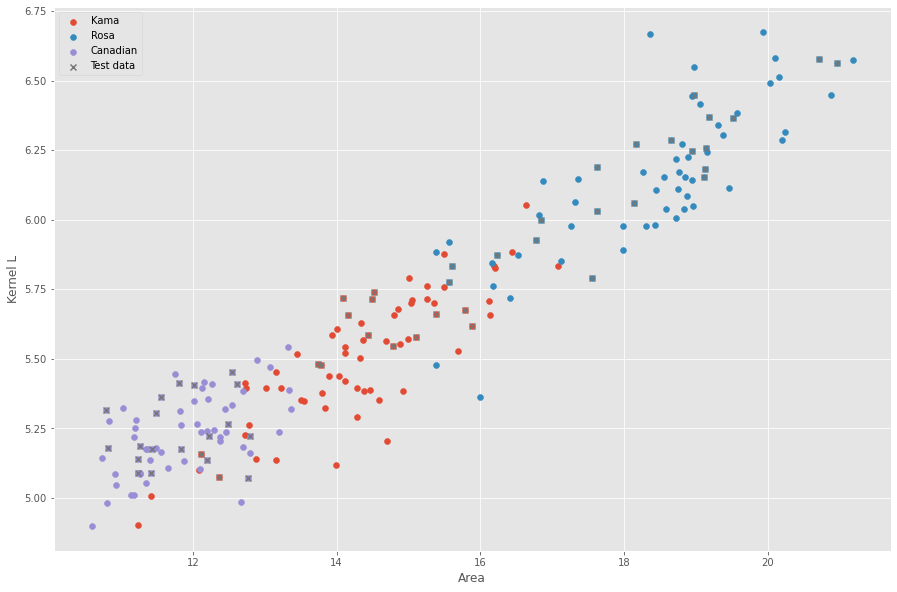

In [96]:
# Segregate the training data.
kama = df[df['Species'] == 'Kama']
rosa = df[df['Species'] == 'Rosa']
cana = df[df['Species'] == 'Canadian']


# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(kama['Area'], kama['Kernel L'], marker='o', label='Kama')
ax.scatter(rosa['Area'], rosa['Kernel L'], marker='o', label='Rosa')
ax.scatter(cana['Area'], cana['Kernel L'], marker='o', label='Canadian')


# Scatter plot for testing data.
ax.scatter(test['Area'], test['Kernel L'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Area')
ax.set_ylabel('Kernel L')
ax.legend();

#### Two Dimensions: Inputs and outputs
***

In [97]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['Area', 'Kernel L']], train['Species']

In [98]:
# Peek at the inputs.
inputs.head()

,Area,Kernel L
165,12.10,5.105
49,14.86,5.678
163,12.55,5.333
78,18.94,6.445
166,12.44,5.319


In [99]:
# Peek at the outputs.
outputs.head()

165    Canadian
49         Kama
163    Canadian
78         Rosa
166    Canadian
Name: Species, dtype: object

### Two dimensions: Logistic regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
***

In [100]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0, max_iter=900)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(max_iter=900, random_state=0)

In [101]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['Area', 'Kernel L']])
predictions

array(['Canadian', 'Canadian', 'Canadian', 'Canadian', 'Canadian',
       'Canadian', 'Kama', 'Kama', 'Canadian', 'Canadian', 'Rosa', 'Rosa',
       'Canadian', 'Kama', 'Rosa', 'Canadian', 'Canadian', 'Rosa', 'Kama',
       'Rosa', 'Canadian', 'Rosa', 'Kama', 'Rosa', 'Rosa', 'Rosa', 'Kama',
       'Kama', 'Canadian', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa', 'Rosa',
       'Rosa', 'Kama', 'Kama', 'Canadian', 'Kama', 'Canadian', 'Kama',
       'Kama', 'Kama', 'Kama', 'Canadian', 'Canadian', 'Rosa', 'Canadian',
       'Canadian', 'Rosa', 'Canadian', 'Canadian'], dtype=object)

In [102]:
# Eyeball the misclassifications.
predictions == test['Species']

206     True
180     True
185     True
159     True
176     True
193     True
22      True
13      True
198     True
208     True
121     True
77      True
186     True
32      True
103     True
149     True
205     True
113     True
138    False
112     True
147     True
104     True
14      True
97      True
107     True
70      True
48      True
134    False
196     True
71      True
98      True
73      True
126     True
129     True
114     True
139     True
20      True
50      True
160     True
51      True
151     True
52      True
54      True
58      True
44      True
146     True
59     False
84      True
199     True
188     True
75      True
62     False
143     True
Name: Species, dtype: bool

In [103]:
# What proportion were correct?
lre.score(test[['Area', 'Kernel L']], test['Species'])

0.9245283018867925

#### Two Dimensions: Misclassified
***

In [104]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

,Area,Kernel L,Kernel W,Groove L,Species,predicted
206,11.23,5.140,2.795,5.003,Canadian,Canadian
180,11.41,5.090,2.775,4.825,Canadian,Canadian
185,11.56,5.363,2.683,5.182,Canadian,Canadian
159,11.49,5.304,2.695,5.310,Canadian,Canadian
176,11.26,5.186,2.710,5.092,Canadian,Canadian


In [105]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['Species']]
misclass

,Area,Kernel L,Kernel W,Groove L,Species,predicted
138,15.60,5.832,3.286,5.752,Rosa,Kama
134,15.56,5.776,3.408,5.847,Rosa,Kama
59,12.11,5.159,3.032,4.519,Kama,Canadian
62,12.36,5.076,3.042,4.605,Kama,Canadian


In [106]:
# Eyeball the descriptive statistics for the species.
train.groupby('Species').mean()

,Area,Kernel L,Kernel W,Groove L
Species,,,,
Canadian,11.895686,5.224353,2.863647,5.119510
Kama,14.335536,5.497750,3.247393,5.090036
Rosa,18.379000,6.143140,3.693500,6.007500


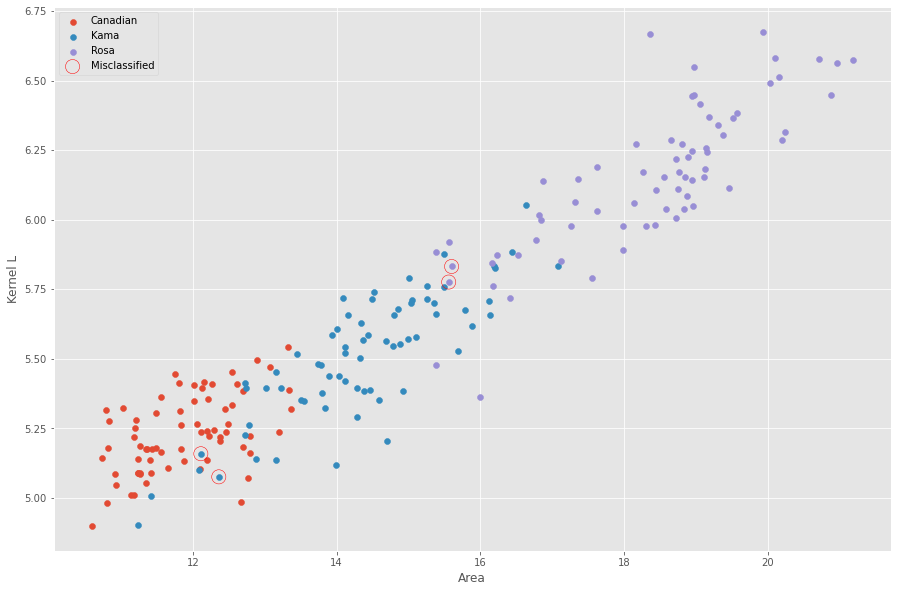

In [107]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for quality, data in df.groupby('Species'):
    ax.scatter(data['Area'], data['Kernel L'], label=quality)
    
# Plot misclassified.
ax.scatter(misclass['Area'], misclass['Kernel L'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('Area')
ax.set_ylabel('Kernel L')
ax.legend();

#### Seperating quality '6'
***

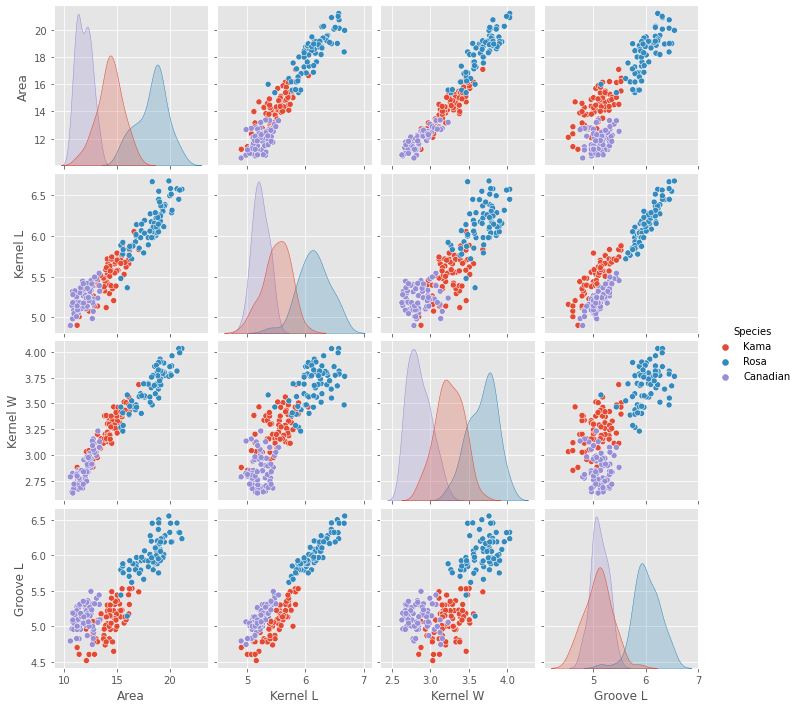

In [108]:
# Another look at this plot.
sns.pairplot(df, hue='Species');

In [109]:
# Give the inputs and outputs convenient names.
inputs = train[['Area', 'Kernel L']]

# Set 'versicolor' and 'virginica' to 'other'.
outputs = train['Species'].apply(lambda x: x if x == 'Kama' else 'other')

# Eyeball outputs
outputs.unique()

array(['other', 'Kama'], dtype=object)

In [110]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [111]:
actual = test['Species'].apply(lambda x: x if x == 'Kama' else 'other')

# What proportion were correct?
lre.score(test[['Area', 'Kernel L']], actual)

0.7358490566037735

#### Using all possible Inputs
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
***


In [112]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/kealanocallaghan2000/datasets/master/seeds_dataset_final.csv", sep = ",")

In [113]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [114]:
# Use all eleven possible inputs.
inputs, outputs = train[['Area', 'Kernel L', 'Kernel W', 'Groove L']], train['Species']

In [115]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0, max_iter=300)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(max_iter=300, random_state=0)

In [116]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['Area', 'Kernel L', 'Kernel W', 'Groove L']])
predictions

array(['Kama', 'Rosa', 'Canadian', 'Canadian', 'Kama', 'Rosa', 'Kama',
       'Kama', 'Kama', 'Kama', 'Kama', 'Rosa', 'Canadian', 'Canadian',
       'Canadian', 'Kama', 'Canadian', 'Canadian', 'Kama', 'Kama', 'Rosa',
       'Kama', 'Rosa', 'Kama', 'Rosa', 'Kama', 'Kama', 'Canadian', 'Kama',
       'Canadian', 'Rosa', 'Canadian', 'Kama', 'Canadian', 'Kama', 'Kama',
       'Rosa', 'Canadian', 'Canadian', 'Rosa', 'Canadian', 'Rosa', 'Rosa',
       'Kama', 'Canadian', 'Rosa', 'Kama', 'Canadian', 'Canadian', 'Kama',
       'Rosa', 'Kama', 'Kama'], dtype=object)

In [117]:
# Eyeball the misclassifications.
(predictions == test['Species']).value_counts()

True     44
False     9
Name: Species, dtype: int64

In [118]:
# What proportion were correct?
lre.score(test[['Area', 'Kernel L', 'Kernel W', 'Groove L']], test['Species'])

0.8301886792452831

#### k Nearest Neighbours Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
***

In [119]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/kealanocallaghan2000/datasets/master/seeds_dataset_final.csv", sep = ",")

In [120]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [121]:
# Use all four possible inputs.
inputs, outputs = train[['Area', 'Kernel L', 'Kernel W', 'Groove L']], train['Species']

In [122]:
# Classifier.
knn = nei.KNeighborsClassifier()

In [123]:
# Fit.
knn.fit(inputs, outputs)

KNeighborsClassifier()

In [124]:
# Test.
knn.score(test[['Area', 'Kernel L', 'Kernel W', 'Groove L']], test['Species'])

0.9245283018867925

In [125]:
# Predict.
predictions = lre.predict(test[['Area', 'Kernel L', 'Kernel W', 'Groove L']])
(predictions == test['Species']).value_counts()

True     48
False     5
Name: Species, dtype: int64

In [126]:
# The score is just the accuracy in this case.
(predictions == test['Species']).value_counts(normalize=True)

True     0.90566
False    0.09434
Name: Species, dtype: float64

#### Cross validation
https://scikit-learn.org/stable/modules/cross_validation.html

***

In [127]:
knn = nei.KNeighborsClassifier()
scores = mod.cross_val_score(knn, df[['Area', 'Kernel L', 'Kernel W', 'Groove L']], df['Species'])
scores

array([0.9047619 , 0.92857143, 0.85714286, 0.92857143, 0.64285714])

In [128]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.8523809523809526 	 Standard Deviation: 0.10795984808337745


In [129]:
lre = lm.LogisticRegression(random_state=0)
scores = mod.cross_val_score(lre, df[['Area', 'Kernel L', 'Kernel W', 'Groove L']], df['Species'])
scores

array([0.95238095, 0.95238095, 0.95238095, 0.95238095, 0.66666667])

In [130]:
print(f"Mean: {scores.mean()} \t Standard Deviation: {scores.std()}")

Mean: 0.8952380952380953 	 Standard Deviation: 0.11428571428571428


<br>

<br>


<br>


***

# Regression analysis
#### Kealan O'Callaghan
https://realpython.com/linear-regression-in-python/
***

### What is Regression?
Regression analysis is a set of statistical processes for estimating the relationships between a dependent variable and one or more independent variables.

### What can it be used for?
Regression analysis will provide you with an equation for a graph so that you can make predictions about your data.

In [131]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# import pandas
import pandas as pd

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (8, 6)

### Data showing the correlation between students test scores and how many hours they spent studying.
***

In [132]:
# Read csv file
df = pd.read_csv("https://raw.githubusercontent.com/kealanocallaghan2000/datasets/master/student_scores.csv")

In [133]:
# get x and y of data
x = df['Hours']
y = df['Scores']

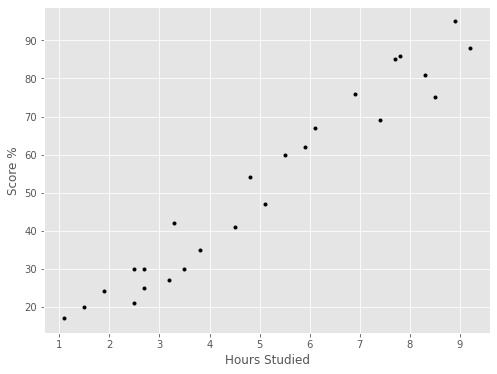

In [134]:
# Create the plot.

plt.plot(x, y, 'k.')

# Set some properties for the plot.
plt.xlabel('Hours Studied')
plt.ylabel('Score %')

# Show the plot.
plt.show()

## Best fit line
***

In [135]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of x and y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# The best m is found by the following calculation.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Use m from above to calculate the best c.
c = y_avg - m * x_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 9.775803 and c is 2.483673.


In [136]:
np.polyfit(x, y, 1)

array([9.77580339, 2.48367341])

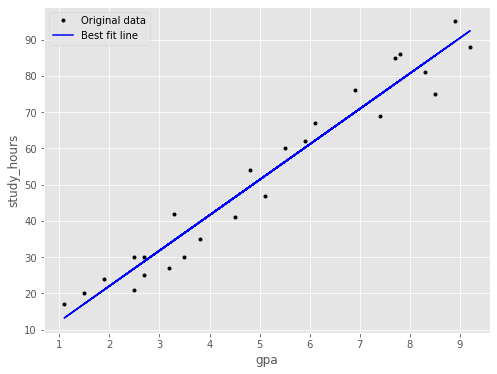

In [137]:
# Plot the best fit line.
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m * x + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('gpa')
plt.ylabel('study_hours')
plt.legend()

# Show the plot.
plt.show()

***
#### y=2x2+5x+1+ϵ

In [138]:
# Blindly try the regression - we get answers.
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(9.775803390787472, 2.48367340537318)

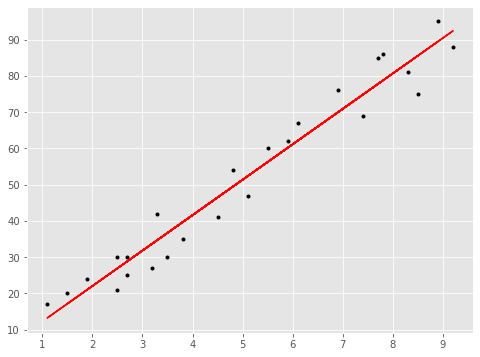

In [139]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')

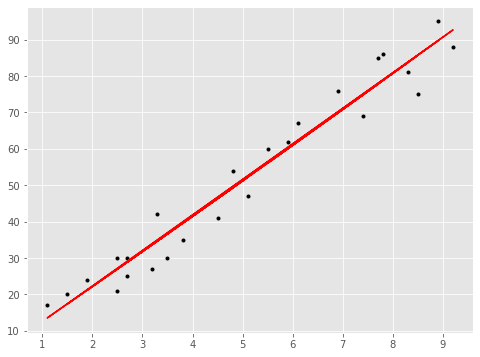

In [140]:
# Create variables with those values.
a, b, c = np.polyfit(x, y, 2)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x + c, 'r-')


<br>
<br>


***

# Clustering
https://scikit-learn.org/stable/modules/clustering.html
***

### What is clustering?
Cluster analysis, or clustering, is an unsupervised machine learning task. It involves automatically discovering natural grouping in data. Unlike supervised learning, clustering algorithms only interpret the input data and find natural groups or clusters in feature space.

### What can clustering be used for?
Retail companies often use clustering to identify groups of households that are similar to each other. For example, a retail company may collect the following information on households: Household income. Household size.
***

##### To demonstrate K-means clustering we will be using the iris data set to predict the set of data

In [160]:
plt.rc('figure', figsize=(7,4))

# loads the built in iris data set
iris = datasets.load_iris()

# scale the iris data
X = scale(iris.data)

# target variable into data frame
Y = pd.DataFrame(iris.target)

# variable names
variable_name  = iris.feature_names

# prints the first ten data points
X[0:10,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

#### Building and running the Model
***

In [161]:
# initiating the k-means - how many species types
clustering = KMeans(n_clusters=3,random_state=5)

# computes the k-means clustering
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

#### Plotting the model outputs
***

In [162]:
# data frame
iris_df = pd.DataFrame(iris.data)
# setting the column names
iris_df.columns =['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
# Set the column name for the target
Y.columns = ['Targets']

Text(0, 0.5, 'Petal Width')

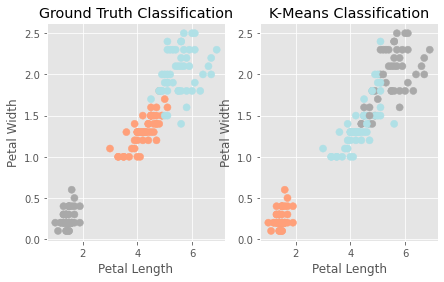

In [163]:
# setting the colors
color_theme = np.array(['darkgray','lightsalmon','powderblue'])

# subplot with 1 row and 2 columns
ax = plt.subplot(1,2,1)


# Show the legend.
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')

# scatter the plot
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')

# second scatter plot with predicted species labels
ax = plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

# Show the legend.
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')

#### Evaluating the results
***

##### Instead of coloring by the clsutering labels, we are going to color by the real label object to see if the k-means predicted the clusters.

Text(0, 0.5, 'Petal Width')

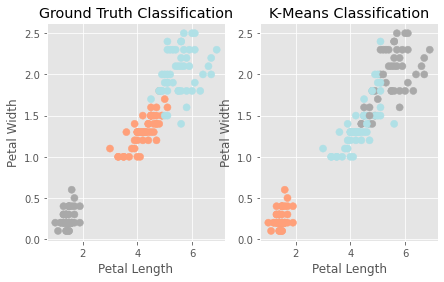

In [164]:
# re-assign label names
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
# subplot with 1 row and 2 columns
ax = plt.subplot(1,2,1)

# Show the axis.
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')

plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')
ax = plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

# Show the legend.
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')

##### High precision and High recall
***

In [165]:
print(classification_report(Y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

